<a href="https://colab.research.google.com/github/mnmahir/best-fyp/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [79]:
# Google Drive
from google.colab import drive
# General
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
# Keras Library


print("Keras version: ", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version:  2.4.3
TensorFlow version: 2.3.0


#**Mounting drive and setting path**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path where dataset is located
dataset_path = '/content/drive/My Drive/FYP Stuff/Datasets/#old/Dataset 1C'
train_path = dataset_path + '/Train'
valid_path = dataset_path + '/Test'    # Some literature use the term "test set" / "valid set" but it is actually a "dev set". This is the set that is iterated during training.
#test_path = dataset_path + '/Test'  # Test set helps evaluate how good your final system is. It's ok not to have test set.

#**Variable Initialization**

In [142]:
IMAGE_CLASSES = ['Normal','Grade I','Grade II','Grade III']         # Classes (Name must be exactly the same as folder name in each set)
IMAGE_SIZE = [224,224]          # Image size (Set for resizing later)
BATCH_SIZE = 16                 # Mini-batch size
SEED = 1                        # Fixed randomness

# **Initialize Functions**
**Data Augmentation**

In [82]:
############################
# Training data generator
############################
def get_train_generator():
  print("Getting train generator...")
  image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255
  )
  
  generator = image_generator.flow_from_directory(
      batch_size = BATCH_SIZE,
      directory = train_path,
      shuffle = True,             # Shuffle input after each epoch
      target_size = IMAGE_SIZE,   # Set image size to be [x]px by [y]px set in IMAGE_SIZE
      class_mode = 'categorical',
      seed = SEED,
  )

  return generator
############################
# Validation data generator
############################
def get_valid_generator():
  print("Getting valid generator...")
  image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255
  )
  
  generator = image_generator.flow_from_directory(
      batch_size = BATCH_SIZE,
      directory = valid_path,
      shuffle = False,             # Shuffle input after each epoch
      target_size = IMAGE_SIZE,   # Set image size to be [x]px by [y]px set in IMAGE_SIZE
      class_mode = WEIGHTED_LOSS,
      seed = SEED,
  )

  return generator

In [83]:
train_generator = get_train_generator()
valid_generator = get_valid_generator()

Getting train generator...
Found 2708 images belonging to 4 classes.
Getting valid generator...
Found 676 images belonging to 4 classes.


In [158]:
# Solving class imbalance
def get_freq_data(generator, classes):
  class_data_labels = generator.classes
  total_class = len(IMAGE_CLASSES)
  print(total_class)
  freq_out = []

  for i in range(total_class):
    total_label_i = 0
    for ele in class_data_labels:
      if ele == i:
        total_label_i += 1
    freq_out.append(total_label_i)
  
  print("Total number of class is:", total_class)
  print("Total image in generator is: ", freq_out)


In [159]:
get_freq_prob_data(valid_generator)


Total number of class is:
Total image in generator is:  [145, 258, 162, 111]


In [136]:
def show_image_generated(generator,index, img_size):
  x, y = valid_generator.__getitem__(index)
  img_plt = math.ceil(math.sqrt(BATCH_SIZE))
  grid_plt = str(img_plt)+str(img_plt)+str(1)

  class_data_labels = generator.classes

  plt.figure(1, figsize = (img_size,img_size))
  for i in range(BATCH_SIZE):
    plt.subplot(img_plt,img_plt,i+1)
    plt.imshow(x[i])
    plt.title("Label =", IMAGE_CLASSES[int(class_data_labels[i])])
  plt.show()

AttributeError: ignored

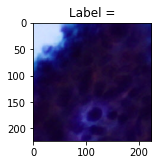

In [137]:
show_image_generated(valid_generator, index = 0, img_size = 10)  # Print image generated by generator. Change index to see different batch (start at 0)

# **Model Development**